In [ ]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [12]:
tickers = ['MSTR', 'ADBE', 'NVO']

In [13]:
# start_date = "2020-01-01"
# end_date = datetime.now().strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# # download data to csv using tickers names and end_date as filename
# data.to_csv("_".join(tickers) + "_" + end_date + ".csv")

# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("_".join(tickers) + "_" + end_date + ".csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# Convert index to datetime
df.index = pd.to_datetime(df.index)

# Show the result
df.head()

Ticker        MSTR                                          ADBE              \
Price         Open    High     Low   Close    Volume        Open        High   
Date                                                                           
2020-01-02  14.284  14.489  14.272  14.431  276000.0  330.000000  334.480011   
2020-01-03  14.302  14.489  14.280  14.357  585000.0  329.170013  332.980011   
2020-01-06  14.325  14.546  14.325  14.425  327000.0  328.290009  333.910004   
2020-01-07  14.400  14.537  14.324  14.387  349000.0  334.149994  334.790009   
2020-01-08  14.395  14.547  14.207  14.371  395000.0  333.809998  339.230011   

Ticker                                               NVO             \
Price              Low       Close     Volume       Open       High   
Date                                                                  
2020-01-02  329.170013  334.429993  1990100.0  26.487124  26.528006   
2020-01-03  328.690002  331.809998  1577600.0  25.851180  26.073762   
2020-01-06  328.190002  333.709991  1874700.0  25.887519  25.973825   
2020-01-07  332.309998  333.390015  2500800.0  25.892062  25.892062   
2020-01-08  333.399994  337.869995  2248500.0  25.851180  25.978369   

Ticker                                       
Price             Low      Close     Volume  
Date                                         
2020-01-02  26.350849  26.509836  2224800.0  
2020-01-03  25.828468  25.942030  2491200.0  
2020-01-06  25.833008  25.896603  2495000.0  
2020-01-07  25.692194  25.869350  2080600.0  
2020-01-08  25.742160  25.823925  1826200.0

In [14]:
# keep only 'Close' prices for each ticker
df = df.xs('Close', level=1, axis=1)

In [15]:
# Show the result
df.head()

Ticker,MSTR,ADBE,NVO
Date,,,
2020-01-02,14.431,334.429993,26.509836
2020-01-03,14.357,331.809998,25.942030
2020-01-06,14.425,333.709991,25.896603
2020-01-07,14.387,333.390015,25.869350
2020-01-08,14.371,337.869995,25.823925


In [16]:
# function to invert prices
def invert_prices(prices):
    return 1 / prices

# Invert prices for each ticker
inverted_df = df.apply(invert_prices)

In [17]:
inverted_df.head()

Ticker,MSTR,ADBE,NVO
Date,,,
2020-01-02,0.069295,0.002990,0.037722
2020-01-03,0.069652,0.003014,0.038547
2020-01-06,0.069324,0.002997,0.038615
2020-01-07,0.069507,0.002999,0.038656
2020-01-08,0.069585,0.002960,0.038724


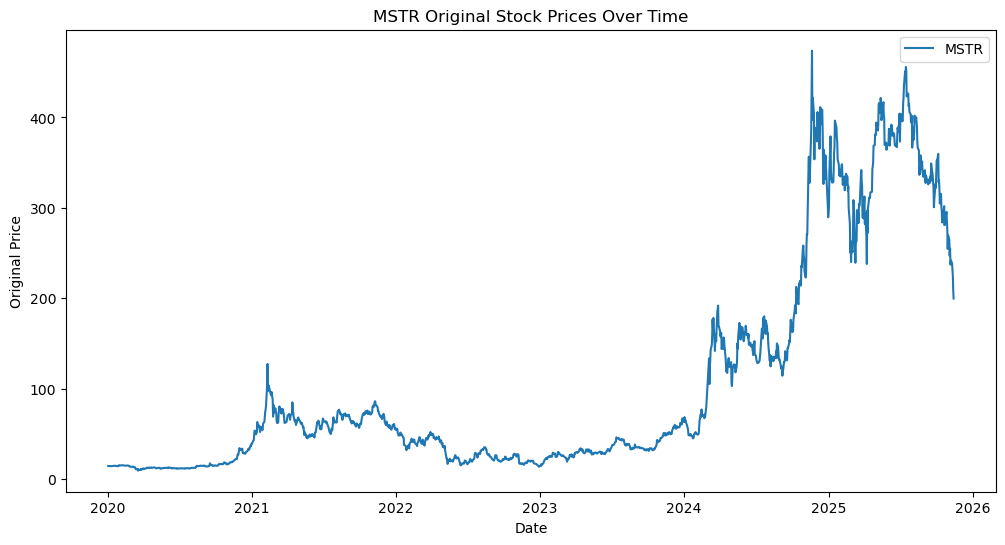

In [24]:
# plot MSTR original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MSTR'], label='MSTR')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('MSTR Original Stock Prices Over Time')
plt.legend()
plt.show()

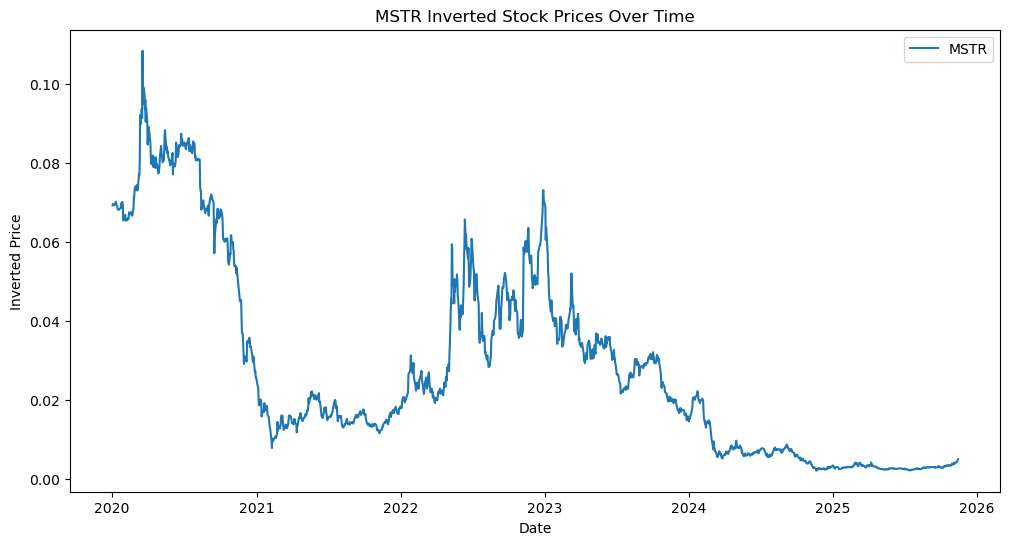

In [19]:
# plot MSTR inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['MSTR'], label='MSTR')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('MSTR Inverted Stock Prices Over Time')
plt.legend()
plt.show()

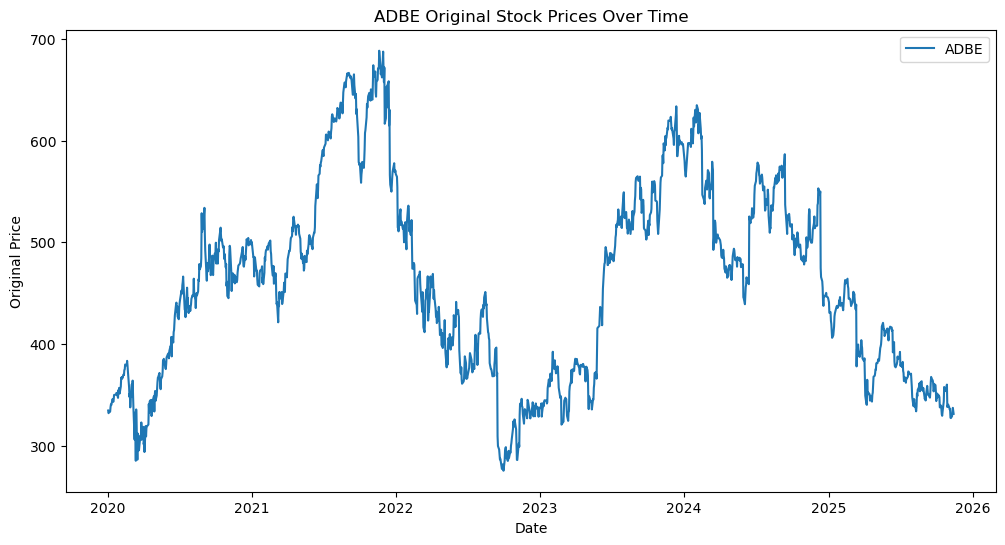

In [23]:
# plot ADBE original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ADBE'], label='ADBE')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('ADBE Original Stock Prices Over Time')
plt.legend()
plt.show()

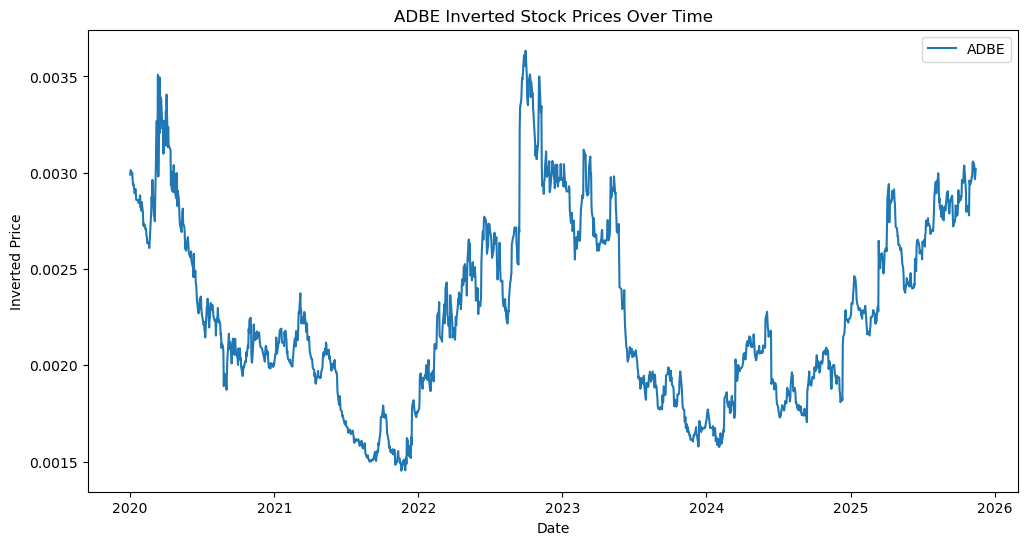

In [20]:
# plot ADBE inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['ADBE'], label='ADBE')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('ADBE Inverted Stock Prices Over Time')
plt.legend()
plt.show()

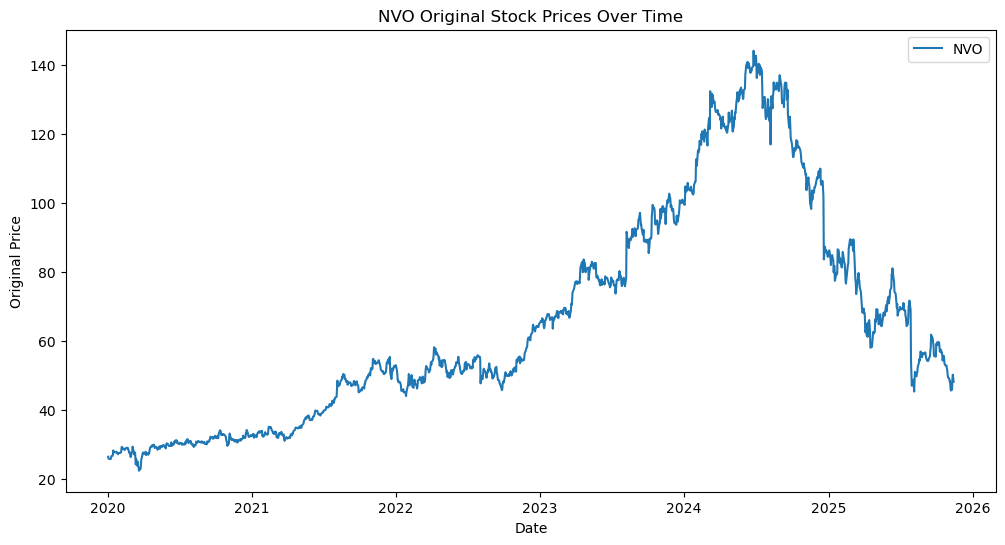

In [22]:
# plot NVO original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['NVO'], label='NVO')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('NVO Original Stock Prices Over Time')
plt.legend()
plt.show()

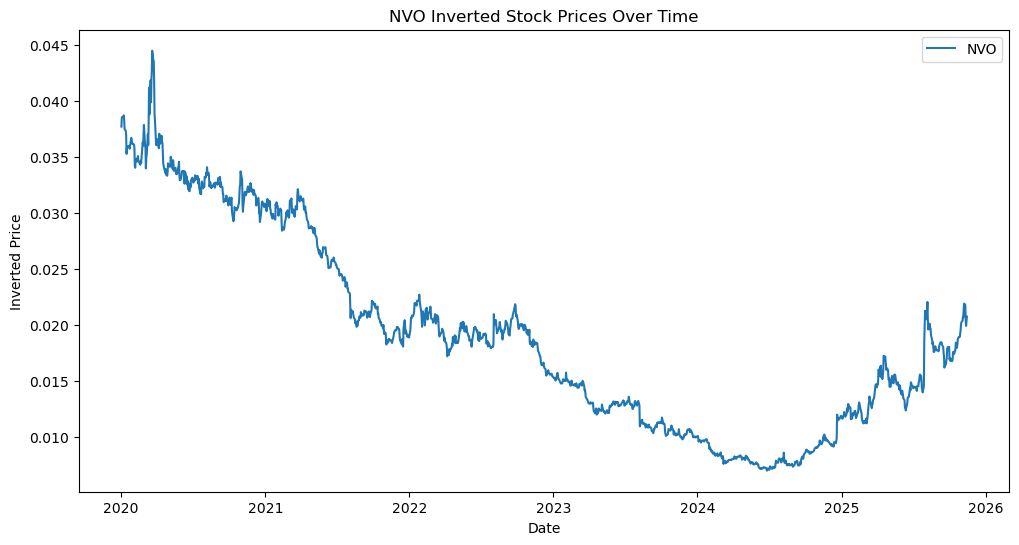

In [21]:
# plot NVO inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['NVO'], label='NVO')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('NVO Inverted Stock Prices Over Time')
plt.legend()
plt.show()